In [16]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)
import tensorflow as tf
import tempfile

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [17]:
x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

# W = tf.Variable(tf.zeros([784,10]))
# b = tf.Variable(tf.zeros([10]))

# sess.run(tf.global_variables_initializer())

In [18]:
# y = tf.matmul(x,W) + b
# cross_entropy = tf.reduce_mean(
#     tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))
# train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

# for _ in range(1000):
#   batch = mnist.train.next_batch(100)
#   train_step.run(feed_dict={x: batch[0], y_: batch[1]})
    
# correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
# accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
# print(accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

In [19]:
def weight_variable(shape):
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial)

def bias_variable(shape):
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial)

In [20]:
def conv2d(x, W):
  return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
  return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

In [21]:
# Reshape to use within a convolutional neural net.
# Last dimension is for "features" - there is only one here, since images are
# grayscale -- it would be 3 for an RGB image, 4 for RGBA, etc.
with tf.name_scope('reshape'):
    x_image = tf.reshape(x, [-1, 28, 28, 1])

# First convolutional layer - maps one grayscale image to 32 feature maps.
with tf.name_scope('conv1'):
    W_conv1 = weight_variable([5, 5, 1, 32])
    b_conv1 = bias_variable([32])
    h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
# Pooling layer - downsamples by 2X.
with tf.name_scope('pool1'):
    h_pool1 = max_pool_2x2(h_conv1)

In [22]:
# Second convolutional layer -- maps 32 feature maps to 64.
with tf.name_scope('conv2'):
    W_conv2 = weight_variable([5, 5, 32, 64])
    b_conv2 = bias_variable([64])
    h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
    
# Second pooling layer.
with tf.name_scope('pool2'):
    h_pool2 = max_pool_2x2(h_conv2)

In [23]:
# Fully connected layer 1 -- after 2 round of downsampling, our 28x28 image
# is down to 7x7x64 feature maps -- maps this to 1024 features.
with tf.name_scope('fc1'):
    W_fc1 = weight_variable([7 * 7 * 64, 1024])
    b_fc1 = bias_variable([1024])

    h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
    h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)


# Dropout - controls the complexity of the model, prevents co-adaptation of
# features.
with tf.name_scope('dropout'):
    keep_prob = tf.placeholder(tf.float32)
    h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

# Map the 1024 features to 10 classes, one for each digit
with tf.name_scope('fc2'):
    W_fc2 = weight_variable([1024, 10])
    b_fc2 = bias_variable([10])

    y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2
    


In [24]:
with tf.name_scope('loss'):
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=y_,
                                                            logits=y_conv)
    cross_entropy = tf.reduce_mean(cross_entropy)

with tf.name_scope('adam_optimizer'):
    train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

with tf.name_scope('accuracy'):
    correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_, 1))
    correct_prediction = tf.cast(correct_prediction, tf.float32)
accuracy = tf.reduce_mean(correct_prediction)
graph_location = tempfile.mkdtemp()
print('Saving graph to: %s' % graph_location)
train_writer = tf.summary.FileWriter(graph_location)
train_writer.add_graph(tf.get_default_graph())


# h_conv1.eval(feed_dict={
#       x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0})

Saving graph to: /tmp/tmpblfh0R


In [25]:

sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())
for i in range(20000):
  batch = mnist.train.next_batch(50)
  if i % 100 == 0:
    train_accuracy = accuracy.eval(feed_dict={
        x: batch[0], y_: batch[1], keep_prob: 1.0})
    print('step %d, training accuracy %g' % (i, train_accuracy))
  train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})

print('test accuracy %g' % accuracy.eval(feed_dict={
    x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))



step 0, training accuracy 0.04
step 100, training accuracy 0.92
step 200, training accuracy 0.92
step 300, training accuracy 0.94
step 400, training accuracy 0.98
step 500, training accuracy 0.9
step 600, training accuracy 0.96
step 700, training accuracy 0.94
step 800, training accuracy 0.94
step 900, training accuracy 0.98
step 1000, training accuracy 0.94
step 1100, training accuracy 0.94
step 1200, training accuracy 0.96
step 1300, training accuracy 1
step 1400, training accuracy 0.96
step 1500, training accuracy 0.94
step 1600, training accuracy 0.98
step 1700, training accuracy 0.96
step 1800, training accuracy 0.98
step 1900, training accuracy 0.96
step 2000, training accuracy 0.96
step 2100, training accuracy 1
step 2200, training accuracy 0.96
step 2300, training accuracy 0.98
step 2400, training accuracy 0.98
step 2500, training accuracy 0.96
step 2600, training accuracy 0.98
step 2700, training accuracy 1
step 2800, training accuracy 0.94
step 2900, training accuracy 0.96
st

In [27]:
h_conv1_array = h_conv1.eval(feed_dict={
      x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0})



TypeError: Invalid dimensions for image data

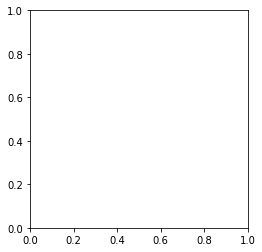

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

# plt.imshow(h_conv1_array)


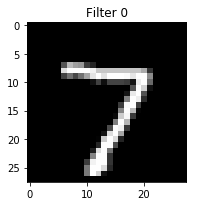

In [62]:
import math
def plotNNFilter(units):
    filters = units.shape[3]
    plt.figure(1, figsize=(20,20))
    n_columns = 6
    n_rows = math.ceil(filters / n_columns) + 1
    for i in range(filters):
        plt.subplot(n_rows, n_columns, i+1)
        plt.title('Filter ' + str(i))
        plt.imshow(units[0,:,:,i], interpolation="nearest", cmap="gray")
        
test_feed_dict = {x:[mnist.test.images[0]]}
x_image_1 = x_image.eval(test_feed_dict)
plotNNFilter(x_image_1)



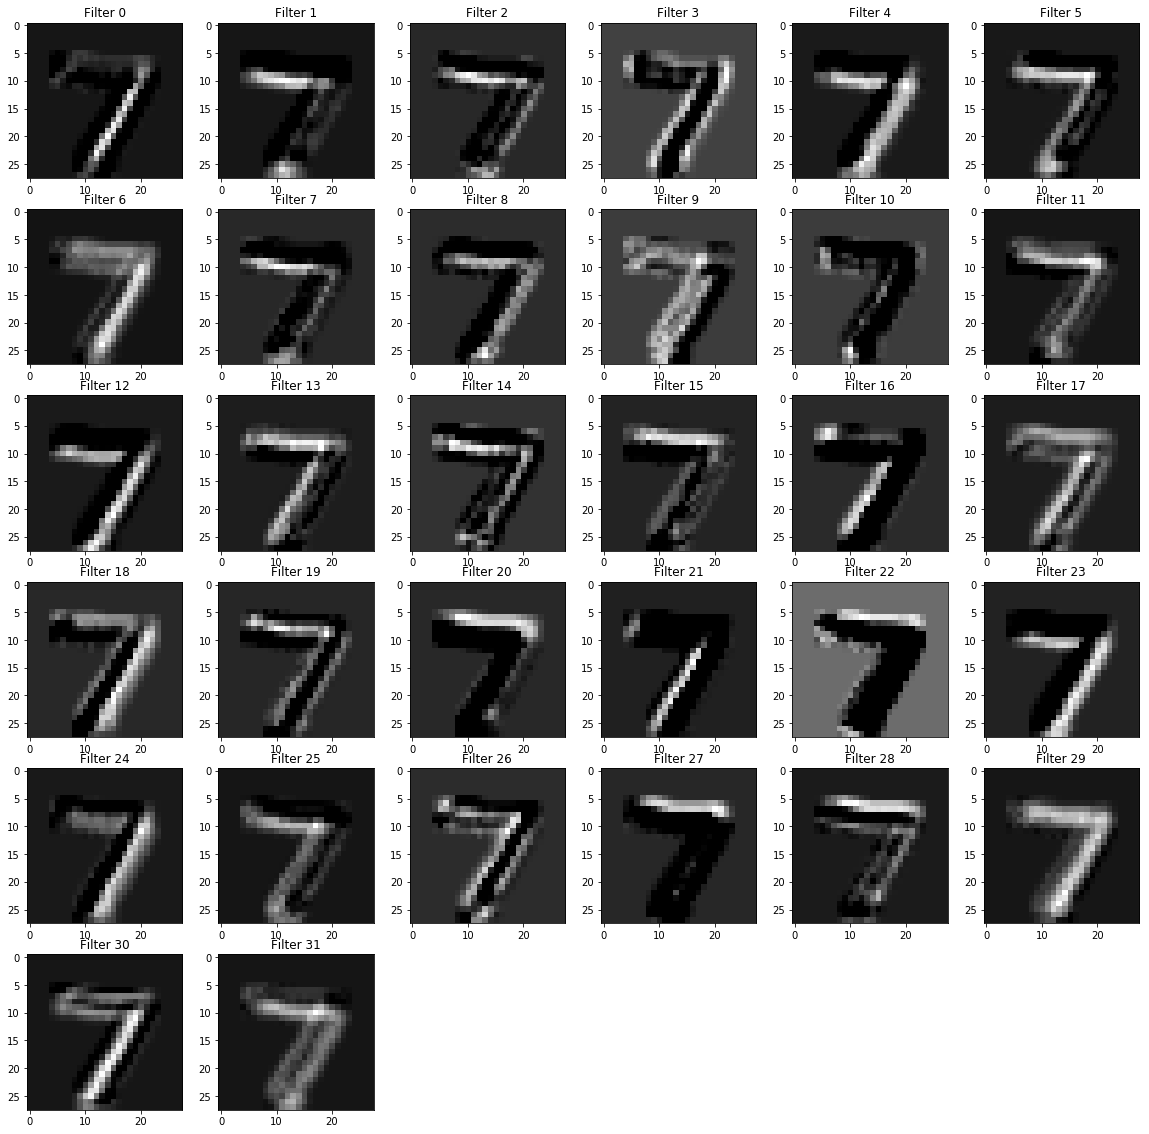

In [64]:
plotNNFilter(h_conv1.eval(test_feed_dict))

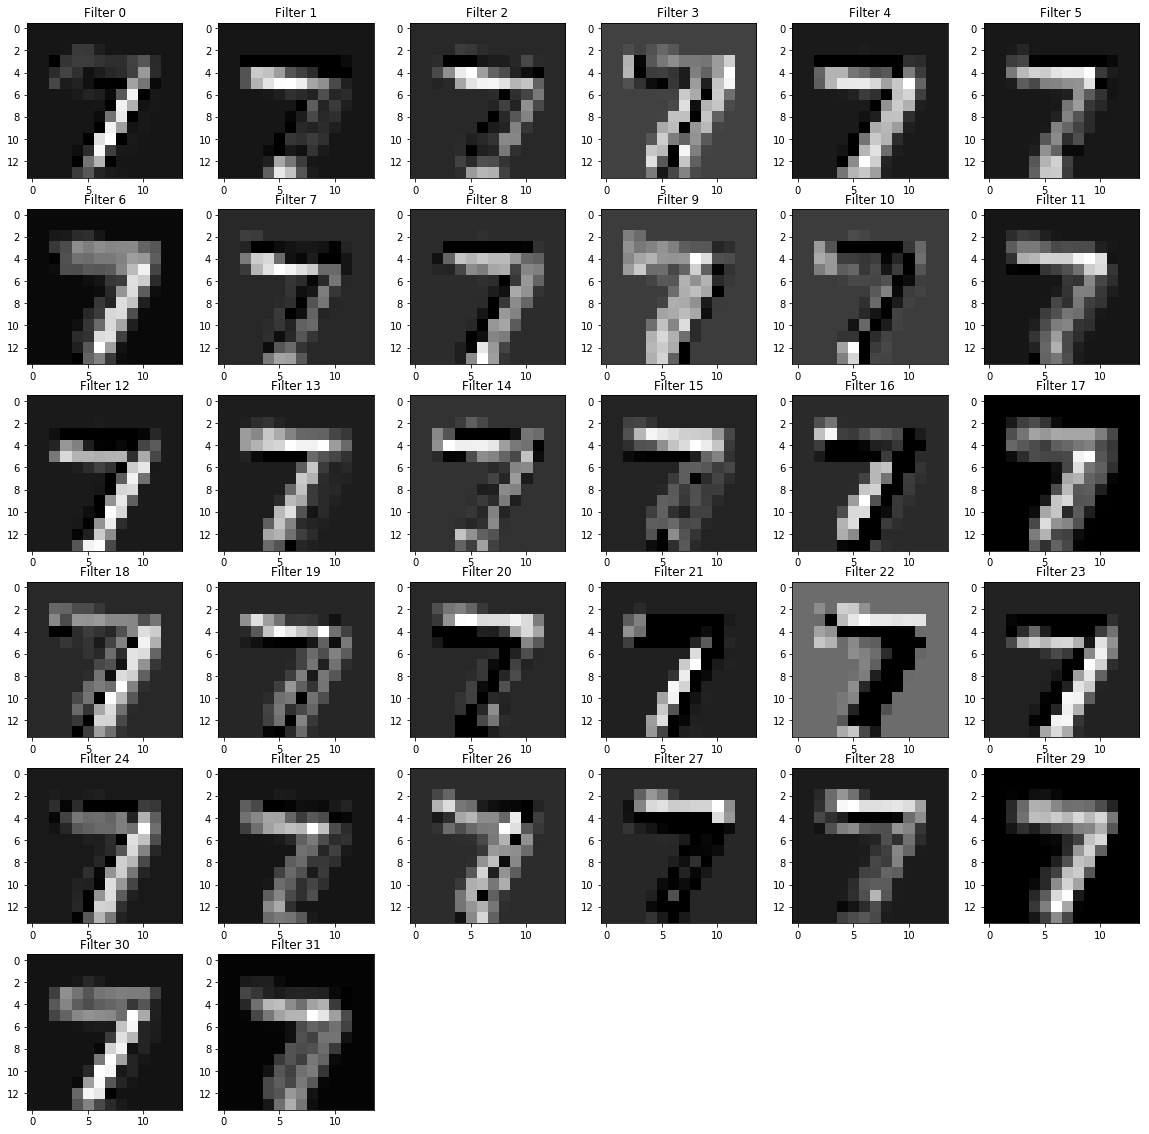

In [65]:
plotNNFilter(h_pool1.eval(test_feed_dict))

In [ ]:
# sess.close()